In [1]:
import numpy as np
import matrixgen, prob_solvers
import standard_solvers as solvers
from scipy import stats, linalg, sparse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def result_to_err(result, x_ast):
    if type(result) is list:
        return np.column_stack([result_to_err(r, x) for r, x in zip(result, x_ast.T)])
    return np.linalg.norm(result.iterations - x_ast[:,None], axis=0)

In [3]:
lamb = 10
N = 50
nugget = 10.

x0 = np.zeros(N)
Sigma0 = np.eye(N)

In [4]:
U = matrixgen.diaconis_shahshahani(N)
evals = stats.gamma(a=9.0, scale=2).rvs(N)

In [5]:
x_ast = np.random.normal(size=(N, 20))

In [6]:
omega = 1./np.max(evals)
res_rich = []
res_jac = []
res_gs = []
for i in range(x_ast.shape[1]):
    A = U.dot(np.diag(evals).dot(U.T))
    # perturb A, just a little, to get something diagonally dominant
    A += nugget*np.eye(N)
    b = A.dot(x_ast[:,i])
    res_rich.append(solvers.richardson(x0, A, b, 50, omega, detailed=True))
    res_jac.append(solvers.jacobi(x0, A, b, 50, detailed=True))
    res_gs.append(solvers.gauss_seidel(x0, A, b, 50, detailed=True))

In [7]:
omega = 1./np.max(evals)
res_rich_p = []
res_jac_p = []
res_gs_p = []
for i in range(x_ast.shape[1]):
    A = U.dot(np.diag(evals).dot(U.T))
    # perturb A, just a little, to get something diagonally dominant
    A += nugget*np.eye(N)
    b = A.dot(x_ast[:,i])
    res_rich_p.append(prob_solvers.richardson(x0, Sigma0, A, b, 50, omega, detailed=True))
    res_jac_p.append(prob_solvers.jacobi(x0, Sigma0, A, b, 50, detailed=True))
    res_gs_p.append(prob_solvers.gauss_seidel(x0, Sigma0, A, b, 50, detailed=True))

Text(0, 0.5, '$\\| x_* - x_m \\|$')

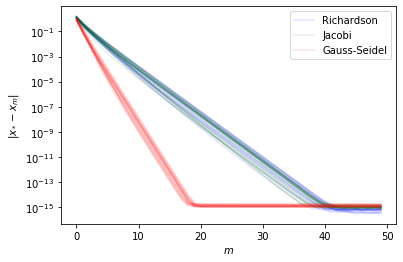

In [12]:
r = plt.semilogy(result_to_err(res_rich, x_ast), c='blue', alpha=0.1, label='Richardson')
j = plt.semilogy(result_to_err(res_jac, x_ast), c='green', alpha=0.1, label='Jacobi')
g = plt.semilogy(result_to_err(res_gs, x_ast), c='red', alpha=0.1, label='Gauss-Seidel')
plt.legend(loc='best', handles=[r[0], j[0], g[0]])
plt.xlabel('$m$')
plt.ylabel('$\| x_* - x_m \|$')

In [13]:
proj = np.random.normal(size=(N, 1))

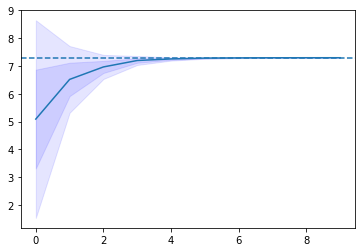

In [14]:
result = res_rich_p
res_ix = 0
n_samp = 10
x_proj = proj.T.dot(x_ast[:,res_ix])
plt.axhline(x_proj, linestyle='--')
mean_proj = proj.T @ result[res_ix].means[:,:n_samp]
mean_proj = mean_proj.ravel()
cov_proj = np.empty(n_samp)
for i in range(n_samp):
    cov_proj[i] = (proj.T @ result[res_ix].covs[:,:,i] @ proj).ravel()
    
plt.plot(mean_proj)
plt.fill_between(np.arange(n_samp), mean_proj + 2*np.sqrt(cov_proj), mean_proj - 2*np.sqrt(cov_proj), alpha=0.1, color='blue')
plt.fill_between(np.arange(n_samp), mean_proj + np.sqrt(cov_proj), mean_proj - np.sqrt(cov_proj), alpha=0.1, color='blue')
